In [1]:

# Import pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Read train data
train = pd.read_csv('demand_forecasting_train_1_month.csv')

# Look at the shape of the data
print('Train shape:', train.shape)

# Look at the head() of the data
print(train.head())


Train shape: (15500, 5)
       id        date  store  item  sales
0  100000  2017-12-01      1     1     19
1  100001  2017-12-02      1     1     16
2  100002  2017-12-03      1     1     31
3  100003  2017-12-04      1     1      7
4  100004  2017-12-05      1     1     20


In [2]:
import pandas as pd

# Read the test data
test = pd.read_csv('demand_forecasting_test.csv')
import pandas as pd

# Print train and test columns
print('Train columns:', train.columns.tolist())
print('Test columns:', test.columns.tolist())

Train columns: ['id', 'date', 'store', 'item', 'sales']
Test columns: ['id', 'date', 'store', 'item']


<Axes: >

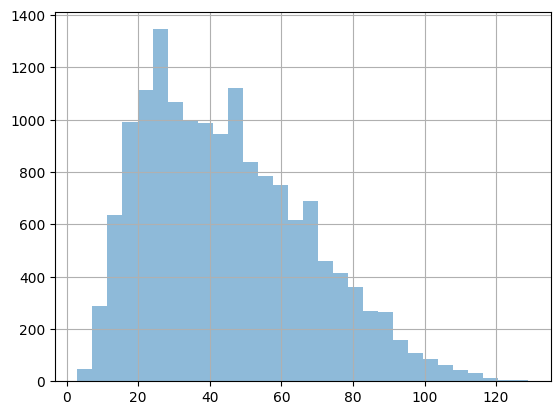

In [3]:
train['sales'].hist(bins=30, alpha=.5)

In [5]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X=train[['id',  'store', 'item']], y=train['sales'])

LinearRegression()

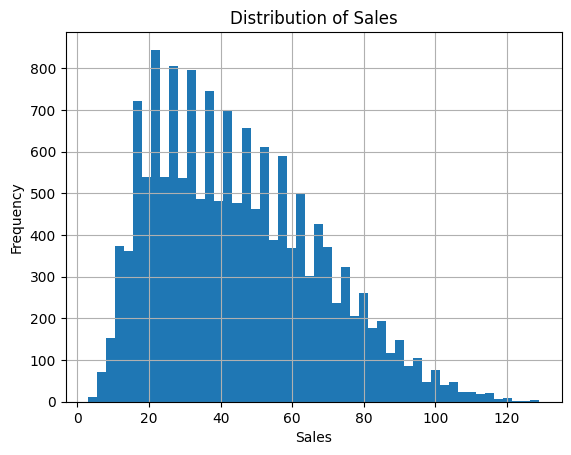

In [6]:
train['sales'].hist(bins=50)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

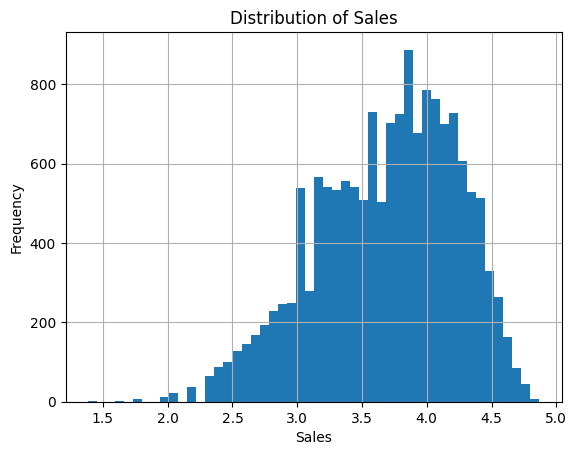

In [9]:
train['log_sales'] = np.log1p(train['sales'])

train['log_sales'].hist(bins=50)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

In [ ]:
#  this is gorun truth that we are supposed to compare our output with
# Read the sample submission file
sample_submission = pd.read_csv('sample_submission.csv')

# Look at the head() of the sample submission
print(sample_submission.head())

# Random Forest

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Read the train data
train = pd.read_csv('demand_forecasting_train_1_month.csv')

# Create a Random Forest object
rf = RandomForestRegressor()

# Train a model
rf.fit(X=train[['store', "item"]], y=train['sales'])

RandomForestRegressor()

In [ ]:
# if sample  submission given we may do it such way  if not then leave it


# Read test and sample submission data
test = pd.read_csv('demand_forecasting_test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# Show the head() of the sample_submission
print(sample_submission.head())

# Get predictions for the test set
test['sales'] = rf.predict(test[['store', 'item']])

# Write test predictions using the sample_submission format
test[["id", "sales"]].to-csv('kaggle_submission.csv', index=False)

# Overfitting live

In [16]:
import xgboost as xgb
train = pd.read_csv('demand_forecasting_train_1_month.csv')
test = pd.read_csv('demand_forecasting_test.csv')
import numpy as np
test['sales'] = np.random.choice(train['sales'], size=len(test))

# Create DMatrix on train data
dtrain = xgb.DMatrix(data=train[['store', 'item']],
                     label=train['sales'])

#xgboost parameters
params = {'objective': 'reg:linear',
          'max_depth': 3,
          'verbosity': 0}

# Train
xg_depth_2 = xgb.train(params=params, dtrain=dtrain)

In [17]:
import xgboost as xgb

# Create DMatrix on train data
dtrain = xgb.DMatrix(data=train[['store', 'item']],
                     label=train['sales'])

# Define xgboost parameters
params = {'objective': 'reg:linear',
          'max_depth': 8,
          'verbosity': 0}

# Train xgboost model
xg_depth_8 = xgb.train(params=params, dtrain=dtrain)

In [18]:
import xgboost as xgb

# Create DMatrix on train data
dtrain = xgb.DMatrix(data=train[['store', 'item']],
                     label=train['sales'])

# Define xgboost parameters
params = {'objective': 'reg:linear',
          'max_depth': 15,
          'verbosity': 0}

# Train xgboost model
xg_depth_15 = xgb.train(params=params, dtrain=dtrain)

In [19]:
from sklearn.metrics import mean_squared_error

dtrain = xgb.DMatrix(data=train[['store', 'item']])
dtest = xgb.DMatrix(data=test[['store', 'item']])

# For each of 3 trained models
for model in [xg_depth_2, xg_depth_8, xg_depth_15]:
    # Make predictions
    train_pred = model.predict(dtrain)     
    test_pred = model.predict(dtest)          
    
    # Calculate metrics
    mse_train = mean_squared_error(train['sales'], train_pred)                  
    mse_test = mean_squared_error(test['sales'], test_pred)
    print('MSE Train: {:.3f}. MSE Test: {:.3f}'.format(mse_train, mse_test))

MSE Train: 263.146. MSE Test: 640.173
MSE Train: 111.333. MSE Test: 794.881
MSE Train: 82.468. MSE Test: 911.693


In [20]:
test.head()

,id,date,store,item,sales
0,0,2018-01-01,1,1,44
1,1,2018-01-02,1,1,12
2,2,2018-01-03,1,1,19
3,3,2018-01-04,1,1,29
4,4,2018-01-05,1,1,16
